In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Arial Unicode MS']  # Mac常用中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

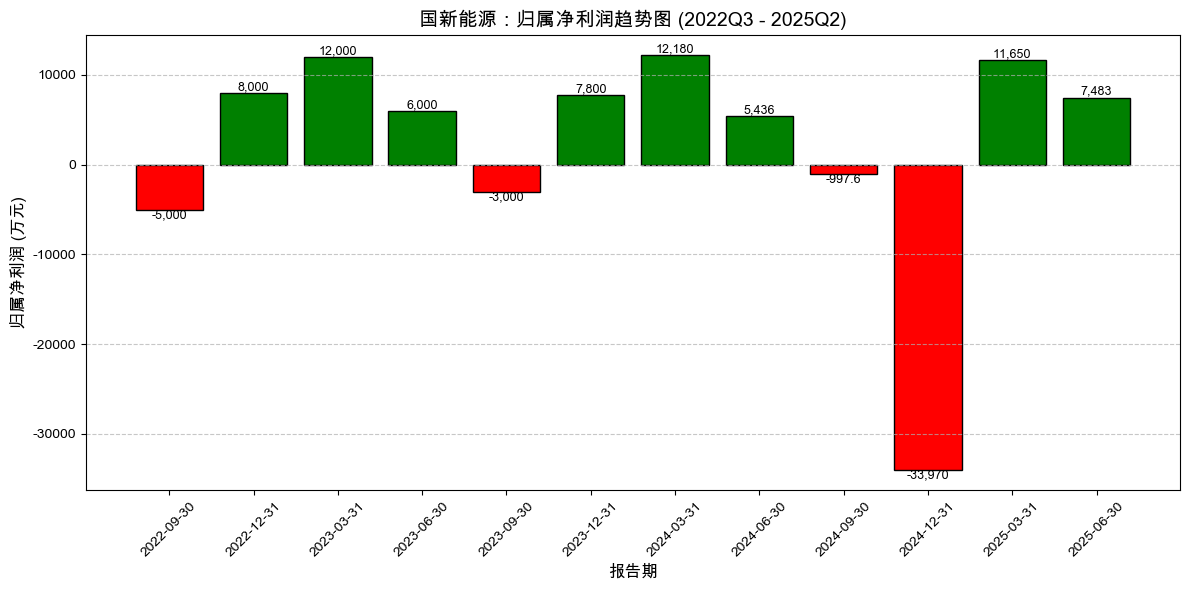

In [2]:
# -----------------------------
# 图3：归属净利润趋势图（按季度）
# -----------------------------

# 手动构建季度数据（单位：万元）
quarters = [
    '2022-09-30', '2022-12-31', '2023-03-31', '2023-06-30',
    '2023-09-30', '2023-12-31', '2024-03-31', '2024-06-30',
    '2024-09-30', '2024-12-31', '2025-03-31', '2025-06-30'
]
net_profits = [
    -5000, 8000, 12000, 6000,
    -3000, 7800, 12180, 5436,
    -997.6, -33970, 11650, 7483
]

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(quarters, net_profits, color=['red' if x < 0 else 'green' for x in net_profits], edgecolor='black')

ax.set_title('国新能源：归属净利润趋势图 (2022Q3 - 2025Q2)', fontsize=14, fontweight='bold')
ax.set_ylabel('归属净利润 (万元)', fontsize=12)
ax.set_xlabel('报告期', fontsize=12)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# 在柱子上方显示数值
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{int(height):,}' if abs(height) >= 1000 else f'{height:.1f}',
            ha='center', va='bottom' if height > 0 else 'top',
            fontsize=9, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

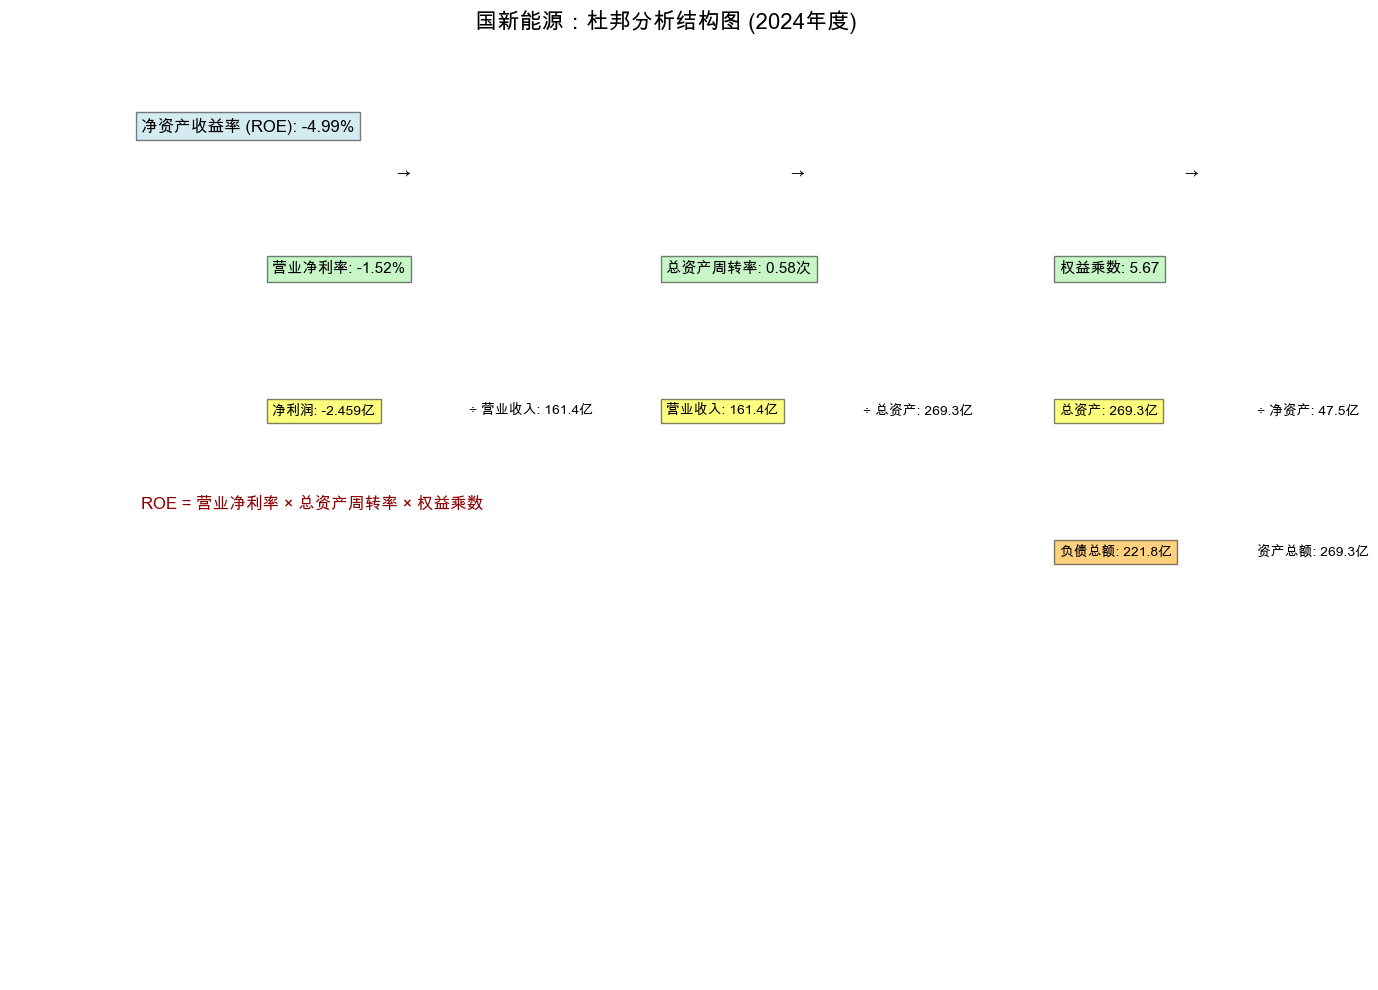

In [3]:
# -----------------------------
# 图4：杜邦分析结构图（2024年度）
# -----------------------------

# 杜邦分析核心指标（2024年数据）
roe = -4.99  # 净资产收益率
net_profit_margin = -1.52  # 营业净利率
asset_turnover = 0.58  # 总资产周转率
equity_multiplier = 5.67  # 权益乘数

# 分解数据
data = {
    "净资产收益率 (ROE)": roe,
    "营业净利率": net_profit_margin,
    "总资产周转率": asset_turnover,
    "权益乘数": equity_multiplier,
    "净利润": -2.459,  # 亿元
    "营业收入": 161.4,  # 亿元
    "总资产": 269.3,   # 亿元
    "净资产": 269.3 - 221.8,  # 亿元（资产 - 负债）
    "负债总额": 221.8,  # 亿元
}

# 创建画布
fig, ax = plt.subplots(figsize=(14, 10))
ax.set_title('国新能源：杜邦分析结构图 (2024年度)', fontsize=16, fontweight='bold')
ax.axis('off')  # 隐藏坐标轴

# 设置层级位置
x_start = 0.1
y_start = 0.9
dy = 0.15

# 第一层：ROE
ax.text(x_start, y_start, f"净资产收益率 (ROE): {roe}%", fontsize=12, fontweight='bold', bbox=dict(facecolor='lightblue', alpha=0.5))

# 第二层：分解为三个因子
y = y_start - dy
ax.text(x_start + 0.1, y, f"营业净利率: {net_profit_margin}%", fontsize=11, bbox=dict(facecolor='lightgreen', alpha=0.5))
ax.text(x_start + 0.4, y, f"总资产周转率: {asset_turnover}次", fontsize=11, bbox=dict(facecolor='lightgreen', alpha=0.5))
ax.text(x_start + 0.7, y, f"权益乘数: {equity_multiplier}", fontsize=11, bbox=dict(facecolor='lightgreen', alpha=0.5))

# 第三层：各因子的计算基础
y -= dy
ax.text(x_start + 0.1, y, f"净利润: {data['净利润']}亿", fontsize=10, bbox=dict(facecolor='yellow', alpha=0.5))
ax.text(x_start + 0.25, y, f"÷ 营业收入: {data['营业收入']}亿", fontsize=10)
ax.text(x_start + 0.4, y, f"营业收入: {data['营业收入']}亿", fontsize=10, bbox=dict(facecolor='yellow', alpha=0.5))
ax.text(x_start + 0.55, y, f"÷ 总资产: {data['总资产']}亿", fontsize=10)
ax.text(x_start + 0.7, y, f"总资产: {data['总资产']}亿", fontsize=10, bbox=dict(facecolor='yellow', alpha=0.5))
ax.text(x_start + 0.85, y, f"÷ 净资产: {data['净资产']:.1f}亿", fontsize=10)

# 第四层：资产与负债结构
y -= dy
ax.text(x_start + 0.7, y, f"负债总额: {data['负债总额']}亿", fontsize=10, bbox=dict(facecolor='orange', alpha=0.5))
ax.text(x_start + 0.85, y, f"资产总额: {data['总资产']}亿", fontsize=10)

# 添加连接线示意（简化版）
# 可以用箭头或线条连接，这里用文字说明替代
ax.text(x_start + 0.2, y_start - 0.05, "→", fontsize=14, ha='center')
ax.text(x_start + 0.5, y_start - 0.05, "→", fontsize=14, ha='center')
ax.text(x_start + 0.8, y_start - 0.05, "→", fontsize=14, ha='center')

# 添加公式注释
formula_y = y_start - 0.4
ax.text(x_start, formula_y, "ROE = 营业净利率 × 总资产周转率 × 权益乘数", fontsize=12, fontweight='bold', color='darkred')

plt.tight_layout()
plt.show()